In [56]:
import spacy
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Sentiment Analysis
5/11/2022
Running down several blog articles in order to judge their sentiment

Schema for test is: title, content, polarity, subjectivity

In [57]:
# SpacyTextBlob objects

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# VADER objects

vader_analyzer = SentimentIntensityAnalyzer()

In [61]:
data_frame = pd.read_csv('./data/dataset.csv')

In [62]:
data_frame.describe()

,word_count
count,210.000000
mean,1329.595238
std,1224.730777
min,2.000000
25%,470.250000
50%,1031.000000
75%,1926.000000
max,6171.000000


In [102]:
def sentiment_analysis(value):
    """Runs the NLP model over each row's content field to interpet the article sentiment.

    Input - pd.DataFrame.row

    Output
          - article polarity: Float
          - article subjectivity: Float  
    """
    if value['content']:
        # spacyTextBlob operation
        text_data = value['content']
        doc = nlp(text_data)

        # VADER content operation is vader_analyzer object
        vader_polarity = vader_analyzer.polarity_scores(text_data)
        vader_polarity_compound = vader_polarity['compound']
        vader_polarity_pos = vader_polarity['pos']
        vader_polarity_neg = vader_polarity['neg']
        vader_polarity_neu = vader_polarity['neu']

        return pd.Series(
            [
                doc._.blob.polarity,
                doc._.blob.subjectivity,
                doc._.blob.sentiment_assessments.assessments,
                vader_polarity_compound,
                vader_polarity_pos,
                vader_polarity_neu,
                vader_polarity_neg,
            ])
    
    else:
        return "N/A", "N/A"

In [103]:
data_frame[[
    'TB_polarity',
    'TB_subjectivity',
    'TB_assessments',
    'Vader_polarity',
    'Vader_positive',
    'Vader_neutral',
    'Vader_negative'
    ]] = data_frame.apply(lambda row,: sentiment_analysis(row), axis=1)

In [ ]:
data_frame.loc[data_frame['Vader_polarity'] >= 0.8].head(20)

### FineGrain look at the content

In [100]:
data_frame.iloc[11]

title              TODOs for Effective ML teamwork at an early-st...
content            Oct 1, 2022 - 7  read Generated by Midjourner ...
word_count                                                      2630
TB_polarity                                                 0.128617
TB_subjectivity                                             0.529179
TB_assessments     [([french], 0.0, 0.0, None), ([classical], 0.0...
Vader_polarity                                                0.9996
Name: 11, dtype: object

In [ ]:
data_frame['content'].iloc[11]

## SpacyTextBlob

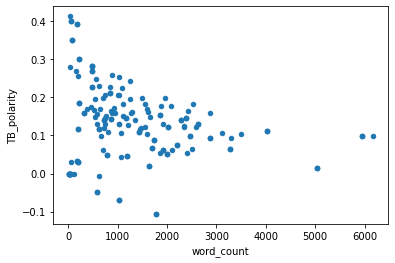

In [75]:
# examine the relationship between polarity and word_count, if any
chart = data_frame.plot(kind='scatter',x='word_count',y='TB_polarity')

In [83]:
# getting more information on the range found
maxdf = data_frame[data_frame['TB_polarity']==data_frame['TB_polarity'].max()]
mindf = data_frame[data_frame['TB_polarity']==data_frame['TB_polarity'].min()]
print("The range of polarity for the given articles is: " + str(maxdf.iloc[0]['TB_polarity']) + str(mindf.iloc[0]['TB_polarity']))

The range of polarity for the given articles is: 0.4121212121212121-0.10604547781967136


## VADER

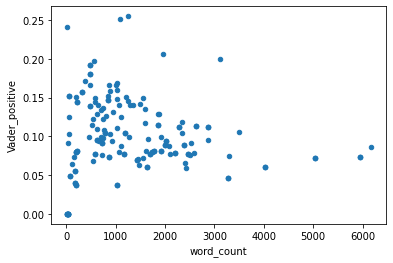

In [105]:
chart = data_frame.plot(kind='scatter',x='word_count',y='Vader_positive')

In [84]:
# getting more information on the range found
maxdf = data_frame[data_frame['Vader_polarity']==data_frame['Vader_polarity'].max()]
mindf = data_frame[data_frame['Vader_polarity']==data_frame['Vader_polarity'].min()]
print("The range of polarity for the given articles is: " + str(maxdf.iloc[0]['Vader_polarity']) + str(mindf.iloc[0]['Vader_polarity']))

The range of polarity for the given articles is: 1.0-0.9939


<AxesSubplot:ylabel='Density'>

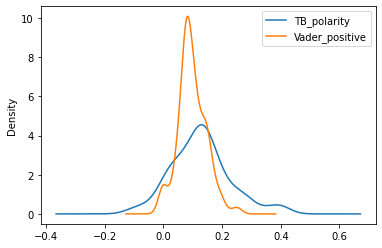

In [106]:
data_frame.plot(kind='kde',x='word_count',y=['TB_polarity','Vader_positive'])